# Tutorial 25: Hierarchical Equal Risk Contribution (HERC) Portfolio Optimization

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4035%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1954%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2410%,1.3735%,-1.0857%
2016-01-06,-11.4863%,-1.5878%,0.2412%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5646%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9035%,-2.9145%
2016-01-07,-5.1389%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2206%,-0.8855%,-4.6059%,-2.5394%,...,-2.2066%,-3.0309%,-1.0410%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5706%,-1.6402%,-1.7641%,-0.1649%,...,-0.1538%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3839%,-0.1116%,-1.1387%,-0.9720%,-1.1254%
2016-01-11,-4.3383%,0.1693%,-1.6851%,-1.0216%,0.0915%,-1.1791%,0.5674%,0.5287%,0.6616%,0.0330%,...,1.6436%,0.0000%,0.9870%,-0.1450%,1.2225%,1.4570%,0.5367%,-0.4607%,0.5800%,-1.9919%


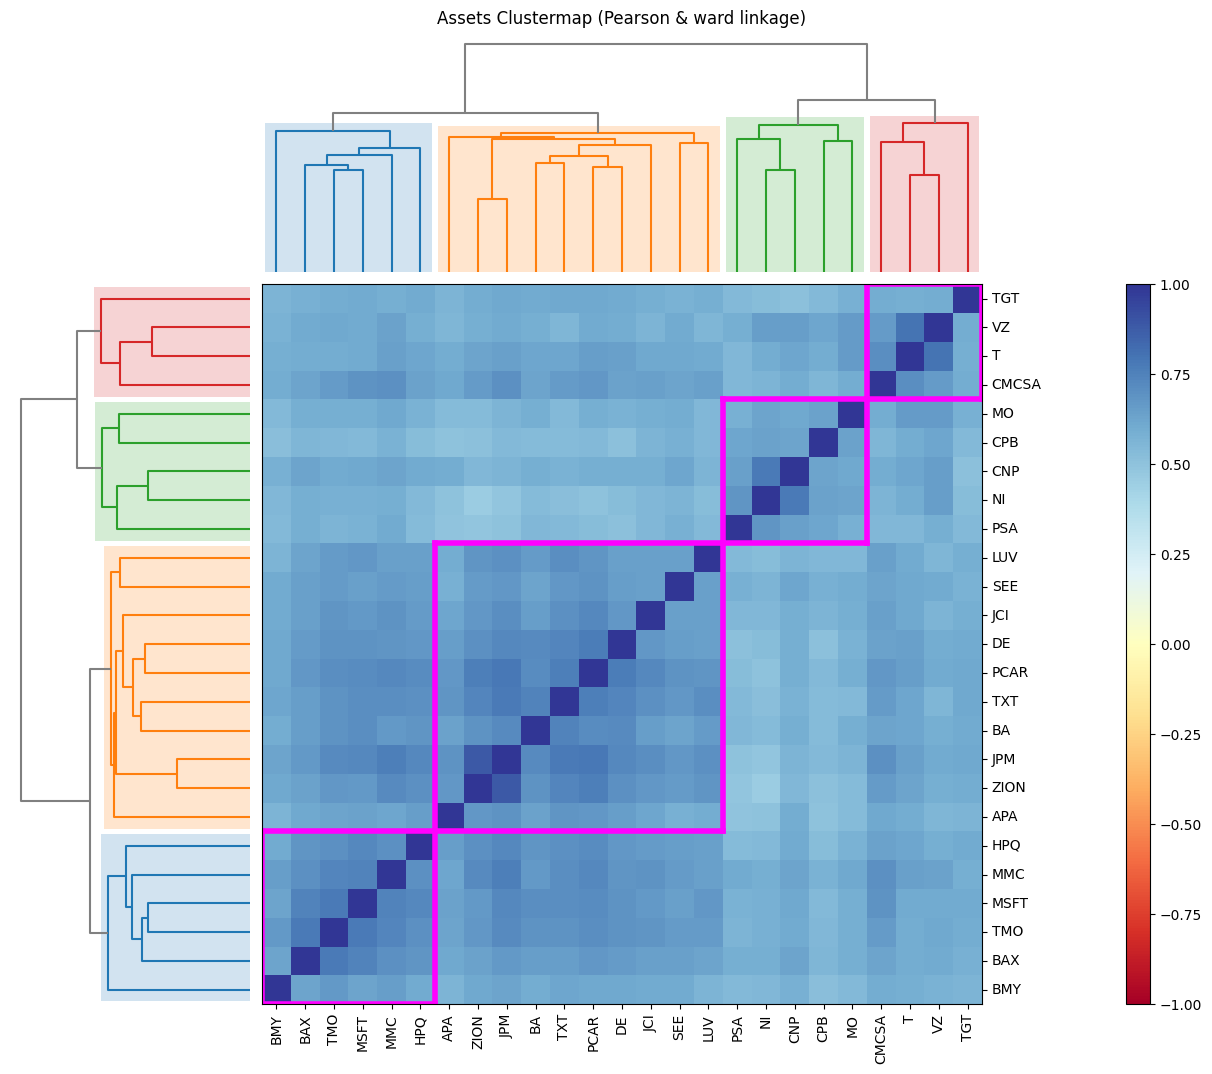

In [3]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_clusters(returns=Y,
                      codependence='pearson',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      #linecolor='tab:purple',
                      ax=None)

The graph above suggest that optimal number of clusters are four.

## 2. Estimating HERC Portfolio

### 2.1 Calculating the HERC portfolio

In [4]:
# Building the portfolio object
port = rp.HCPortfolio(returns=Y)

# Estimate optimal portfolio:

model='HERC' # Could be HRP or HERC
codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'ward' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.6423%,1.7311%,4.5532%,2.6465%,5.8394%,7.6405%,3.9025%,1.7334%,2.2530%,2.2505%,...,7.3688%,2.1231%,6.9433%,2.0169%,7.7390%,3.1855%,4.0472%,1.8479%,8.7857%,1.6270%


### 2.2 Plotting portfolio composition

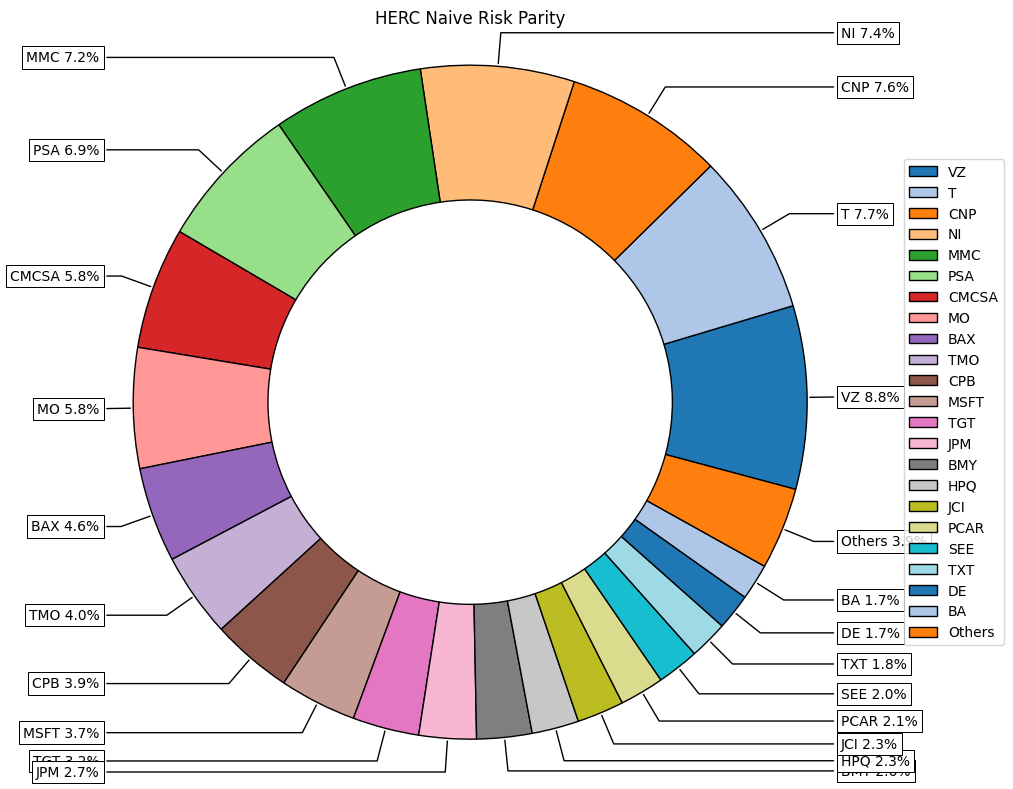

In [5]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='HERC Naive Risk Parity',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

### 2.3 Plotting Risk Contribution

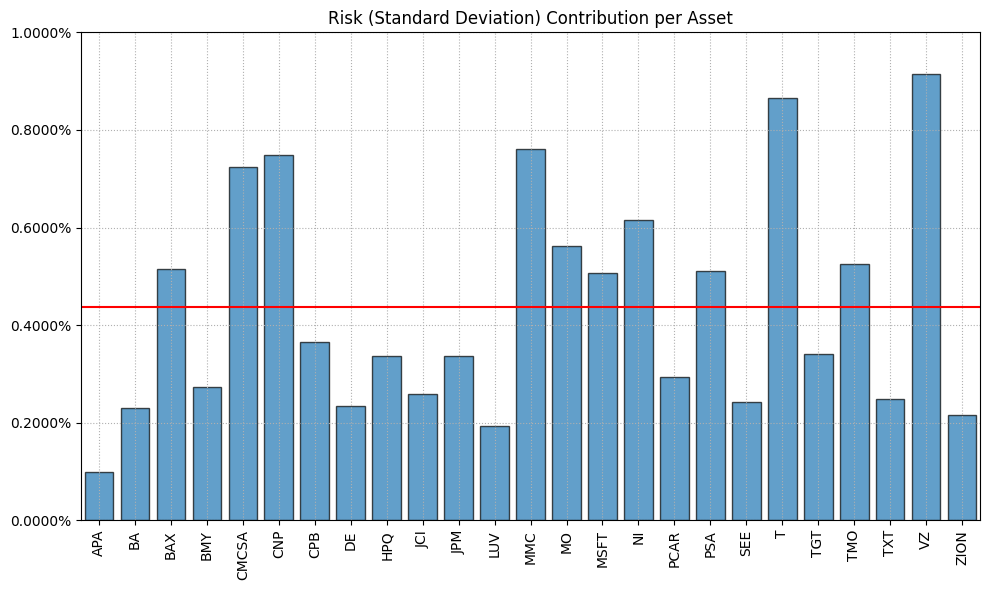

In [6]:
# Plotting the risk contribution per asset

mu = Y.mean()
cov = Y.cov() # Covariance matrix
returns = Y # Returns of the assets

ax = rp.plot_risk_con(w=w,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

### 2.4 Calculate Optimal HERC Portfolios for Several Risk Measures

In [7]:
# Risk Measures available:
#
# 'vol': Standard Deviation.
# 'MV': Variance.
# 'MAD': Mean Absolute Deviation.
# 'GMD': Gini Mean Difference.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'VaR': Conditional Value at Risk.
# 'CVaR': Conditional Value at Risk.
# 'TG': Tail Gini.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax).
# 'RG': Range of returns.
# 'CVRG': CVaR Range of returns.
# 'TGRG': Tail Gini Range of returns.
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'DaR': Drawdown at Risk of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.
# 'MDD_Rel': Maximum Drawdown of compounded cumulative returns (Calmar Ratio).
# 'ADD_Rel': Average Drawdown of compounded cumulative returns.
# 'DaR_Rel': Drawdown at Risk of compounded cumulative returns.
# 'CDaR_Rel': Conditional Drawdown at Risk of compounded cumulative returns.
# 'EDaR_Rel': Entropic Drawdown at Risk of compounded cumulative returns.
# 'UCI_Rel': Ulcer Index of compounded cumulative returns.

rms = ['vol', 'MV', 'MAD', 'GMD', 'MSV', 'FLPM', 'SLPM', 'VaR',
       'CVaR', 'TG', 'EVaR', 'WR', 'RG', 'CVRG', 'TGRG', 'MDD', 
       'ADD', 'DaR', 'CDaR', 'EDaR', 'UCI', 'MDD_Rel',
       'ADD_Rel', 'DaR_Rel', 'CDaR_Rel', 'EDaR_Rel', 'UCI_Rel']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model,
                          codependence=codependence,
                          rm=i,
                          rf=rf,
                          linkage=linkage,
                          max_k=max_k,
                          leaf_order=leaf_order)

    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [8]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,vol,MV,MAD,GMD,MSV,FLPM,SLPM,VaR,CVaR,TG,EVaR,WR,RG,CVRG,TGRG,MDD,ADD,DaR,CDaR,EDaR,UCI,MDD_Rel,ADD_Rel,DaR_Rel,CDaR_Rel,EDaR_Rel,UCI_Rel
APA,1.29%,0.64%,1.28%,1.28%,1.34%,1.20%,1.29%,1.21%,1.35%,1.39%,1.39%,1.37%,1.17%,1.29%,1.30%,0.61%,0.45%,0.60%,0.58%,0.59%,0.52%,0.80%,0.53%,0.75%,0.74%,0.77%,0.61%
BA,2.12%,1.73%,2.17%,2.14%,2.09%,2.23%,2.11%,2.04%,1.97%,1.96%,2.01%,1.89%,1.85%,2.03%,2.03%,2.12%,2.36%,2.34%,2.16%,2.20%,2.29%,2.13%,2.33%,2.32%,2.15%,2.19%,2.28%
BAX,4.41%,4.55%,4.52%,4.47%,4.23%,4.71%,4.30%,4.31%,4.15%,4.08%,3.53%,3.34%,3.91%,4.33%,4.33%,4.27%,6.60%,5.30%,4.87%,4.55%,5.96%,4.33%,6.69%,5.33%,4.88%,4.59%,6.06%
BMY,3.36%,2.65%,3.67%,3.62%,3.10%,3.51%,3.04%,3.70%,3.04%,2.78%,2.24%,2.11%,2.74%,3.35%,3.19%,2.21%,1.39%,2.12%,2.18%,2.16%,1.62%,2.30%,1.26%,2.03%,2.19%,2.19%,1.51%
CMCSA,6.20%,5.84%,5.98%,6.03%,6.27%,6.02%,6.31%,6.47%,6.44%,6.43%,6.46%,6.46%,7.27%,6.22%,6.21%,5.89%,5.76%,4.64%,5.03%,5.48%,5.39%,6.12%,5.82%,5.02%,5.35%,5.75%,5.57%
CNP,6.28%,7.64%,5.83%,5.97%,6.42%,5.84%,6.46%,5.78%,6.82%,7.08%,8.41%,9.11%,8.84%,6.57%,6.77%,9.08%,8.35%,7.71%,7.77%,8.19%,8.40%,8.72%,8.38%,7.63%,7.63%,7.96%,8.43%
CPB,4.49%,3.90%,4.70%,4.67%,4.61%,4.47%,4.50%,4.94%,4.73%,4.51%,4.06%,3.67%,3.75%,4.55%,4.37%,3.17%,1.53%,1.97%,2.33%,2.64%,1.80%,3.55%,1.64%,2.18%,2.62%,2.96%,1.92%
DE,2.12%,1.73%,2.24%,2.19%,2.15%,2.30%,2.17%,2.03%,2.03%,2.04%,2.23%,2.20%,1.64%,2.07%,2.04%,2.70%,3.10%,2.98%,2.69%,2.72%,3.00%,2.46%,2.92%,2.76%,2.56%,2.58%,2.83%
HPQ,3.10%,2.25%,3.29%,3.20%,3.01%,3.33%,3.00%,2.95%,2.87%,2.86%,2.18%,1.95%,2.31%,2.98%,2.98%,2.39%,2.88%,2.63%,2.61%,2.48%,2.71%,2.42%,2.89%,2.63%,2.58%,2.47%,2.69%
JCI,2.41%,2.25%,2.42%,2.43%,2.42%,2.39%,2.41%,2.24%,2.37%,2.40%,2.43%,2.29%,1.83%,2.42%,2.41%,1.68%,1.79%,2.16%,1.96%,1.87%,1.94%,1.65%,1.65%,1.99%,1.83%,1.78%,1.78%


<Axes: >

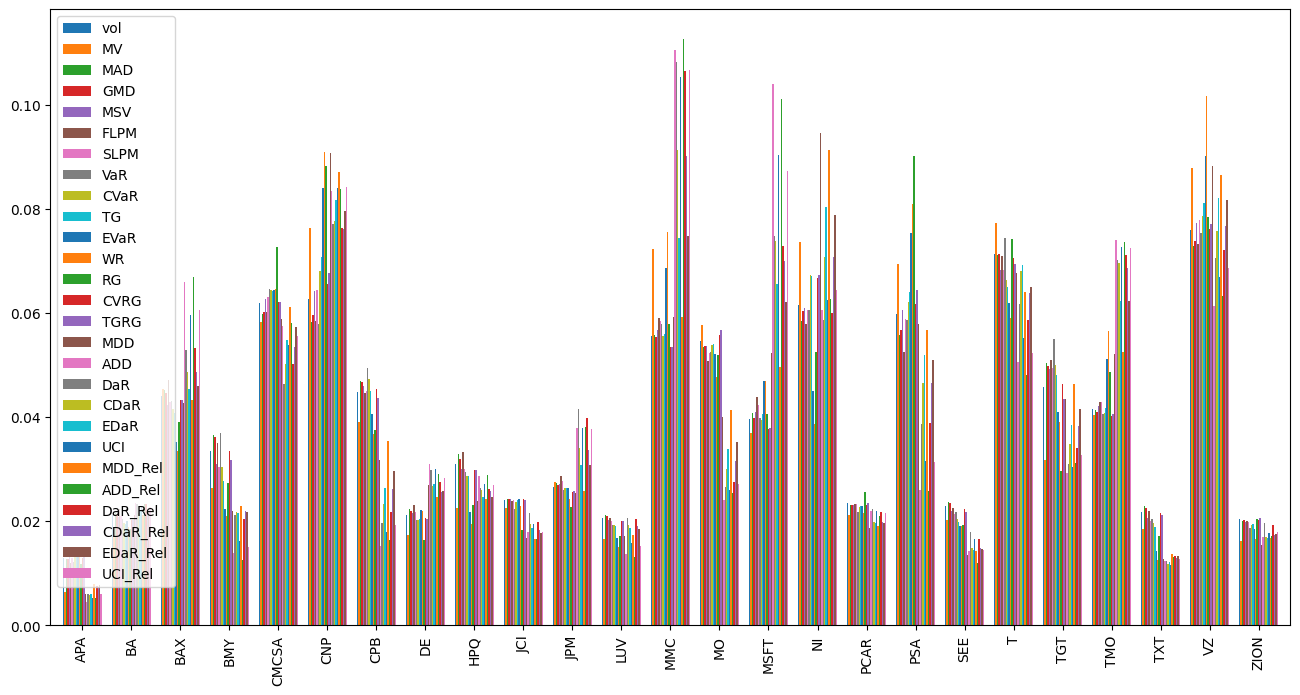

In [9]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(16)
fig.set_figheight(8)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot(kind='bar', width=0.8, ax=ax)